In [ ]:
# import libraries to load the data
import pandas as pd

In [ ]:
df = pd.read_csv('/content/netflix1.csv')

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.shape

(8790, 10)

In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
# convert date_added column to proper datetime format (if it exists)
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [ ]:
df['date_added'].head()

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-22
4,2021-09-24


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


In [ ]:
# Let’s extract the year, month, and day from the date.
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [ ]:
df[['date_added', 'year_added', 'month_added', 'day_added']].head()

,date_added,year_added,month_added,day_added
0,2021-09-25,2021,9,25
1,2021-09-24,2021,9,24
2,2021-09-24,2021,9,24
3,2021-09-22,2021,9,22
4,2021-09-24,2021,9,24


In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24


**Count Movies vs TV Shows**

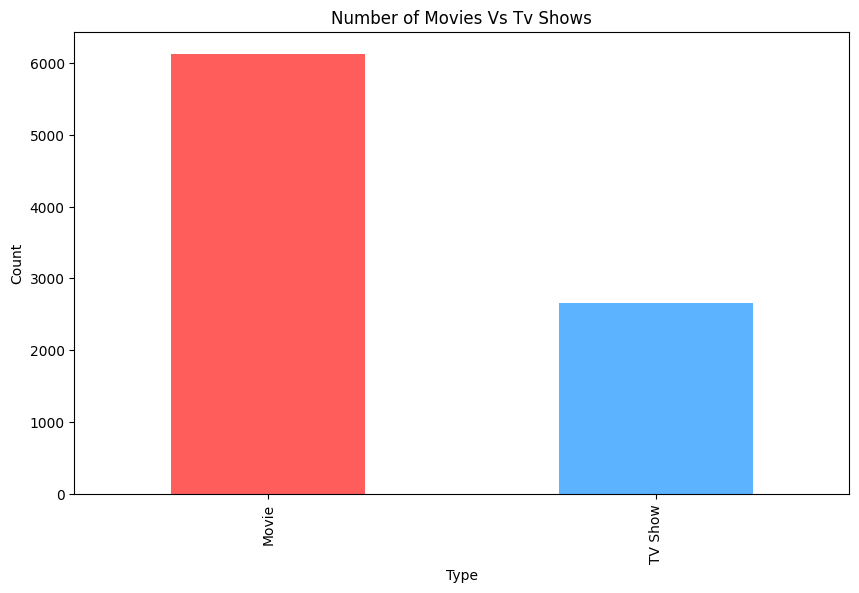

In [ ]:
# lets make a simple bar chart
import matplotlib.pyplot as plt

type_count = df['type'].value_counts()

plt.figure(figsize = (10,6))
type_count.plot(kind = 'bar', color = ['#FF5C5C', '#5CB3FF'])
plt.title('Number of Movies Vs Tv Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



**Observation:**

There are more Movies than TV Shows on Netflix.
This shows that Netflix focuses more on movies in its content library.
However, the share of TV shows is still significant, reflecting Netflix’s investment in series and original shows.

**Pie Chart**

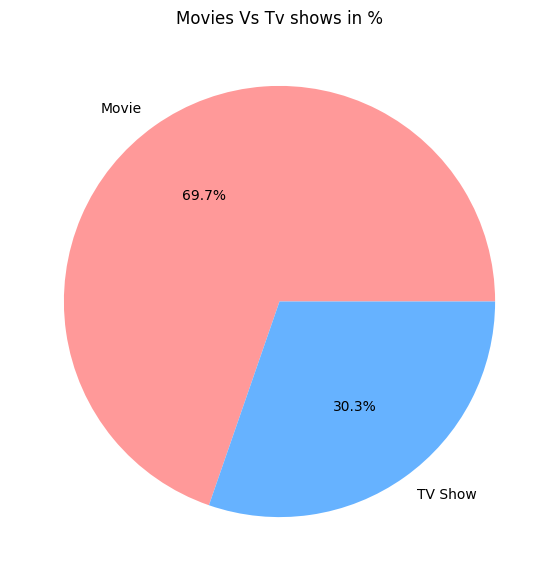

In [ ]:
plt.figure(figsize = (10,7))

plt.pie(type_count, labels = type_count.index , autopct = '%1.1f%%', colors = ['#FF9999','#66B2FF'] )
plt.title('Movies Vs Tv shows in %')
plt.show()

**Top 10 Countries Producing Most Content**

In [ ]:
# Count how many titles each country has
country_count = df['country'].value_counts().head(10)
country_count

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


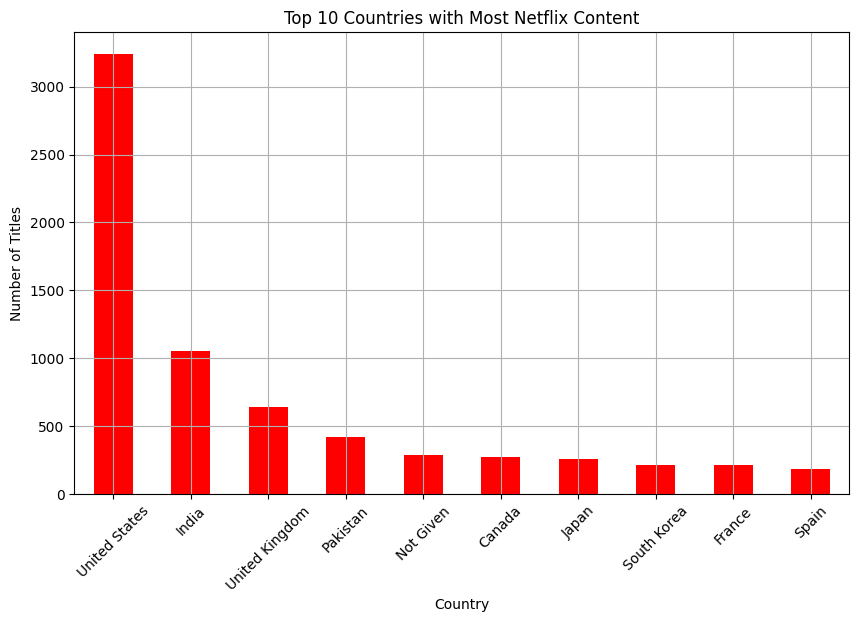

In [ ]:
# Lets Make a bar chart
plt.figure(figsize = (10,6))

country_count.plot(kind = 'bar', color = 'red')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

**Observation:**

The United States has the highest number of titles on Netflix, followed by India, United Kingdom, and Canada.
This indicates that most of the Netflix catalog comes from English-speaking countries.
India’s high ranking also shows Netflix’s growing presence in the Indian entertainment market.

**Most Common Genres (Top 10 Categories)**

str.split(',') → separates the genres where there are commas.

.explode() → turns multiple genres in one row into separate rows.

.str.strip() → removes extra spaces.

.value_counts() → counts how often each genre appears.

In [ ]:
# 'listed_in' column contains multiple genres separated by commas
# Lets Split them and count each
genre_series = df['listed_in'].str.split(',').explode().str.strip()
genre_count = genre_series.value_counts().head(10)

genre_count

,count
listed_in,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1349
Documentaries,869
Action & Adventure,859
TV Dramas,762
Independent Movies,756
Children & Family Movies,641


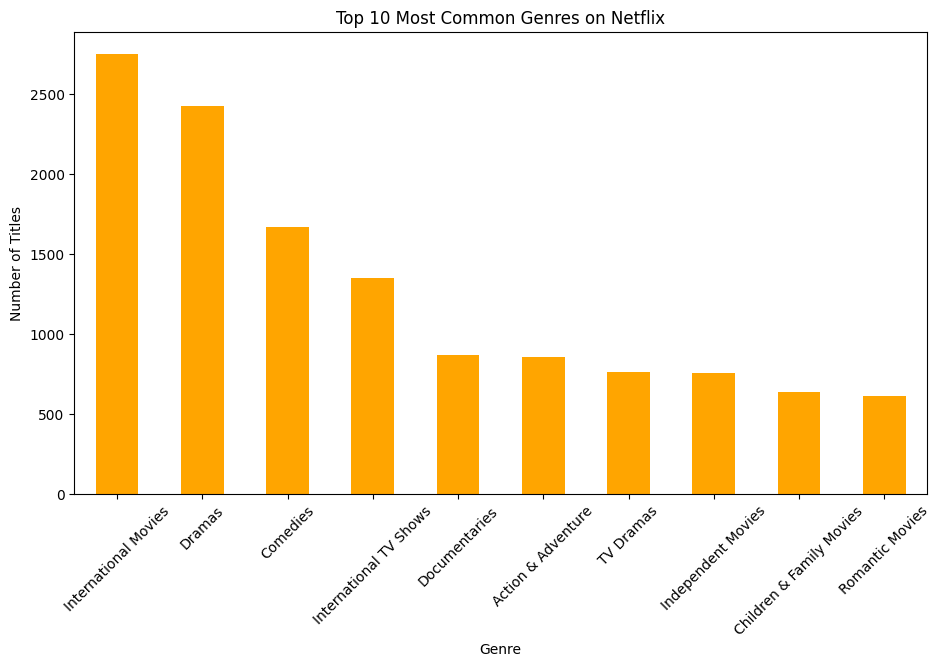

In [ ]:
# visualize
plt.figure(figsize = (11,6))
genre_count.plot(kind = 'bar', color = 'orange')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.show()

**Observation:**

Dramas, Comedies, and Documentaries are the most common genres.
This shows Netflix audiences prefer emotional, entertaining, and real-life stories.
Other genres like Action, Thriller, and Romantic also have a strong presence, giving viewers a wide variety of options.

**Netflix Content Added by Year**

In [ ]:
year_count = df['year_added'].value_counts().sort_index()
print(year_count)

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


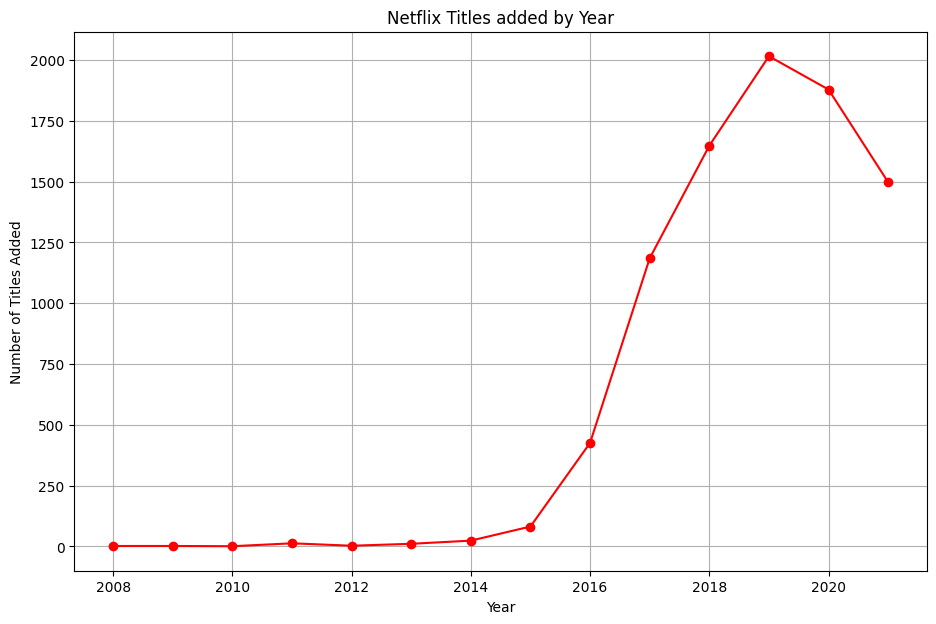

In [ ]:
# visualise
plt.figure(figsize = (11,7))
year_count.plot(kind = 'line', marker = 'o', color = 'red')
plt.title('Netflix Titles added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

**Observation:**

The number of titles added to Netflix increased sharply after 2015, showing the platform’s global expansion and growth in new content production.
There’s a small dip after 2020, possibly due to the pandemic affecting movie and show production.
Overall, the trend clearly shows Netflix’s rapid content growth over the years.

In [ ]:
# Count top 10 directors
directors = df['director'].dropna()
directors = directors.str.split(',').explode().str.strip()
top_directors = directors.value_counts().head(10)
top_directors

,count
director,
Not Given,2588
Rajiv Chilaka,23
Jan Suter,21
Raúl Campos,19
Alastair Fothergill,19
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,15
Cathy Garcia-Molina,13


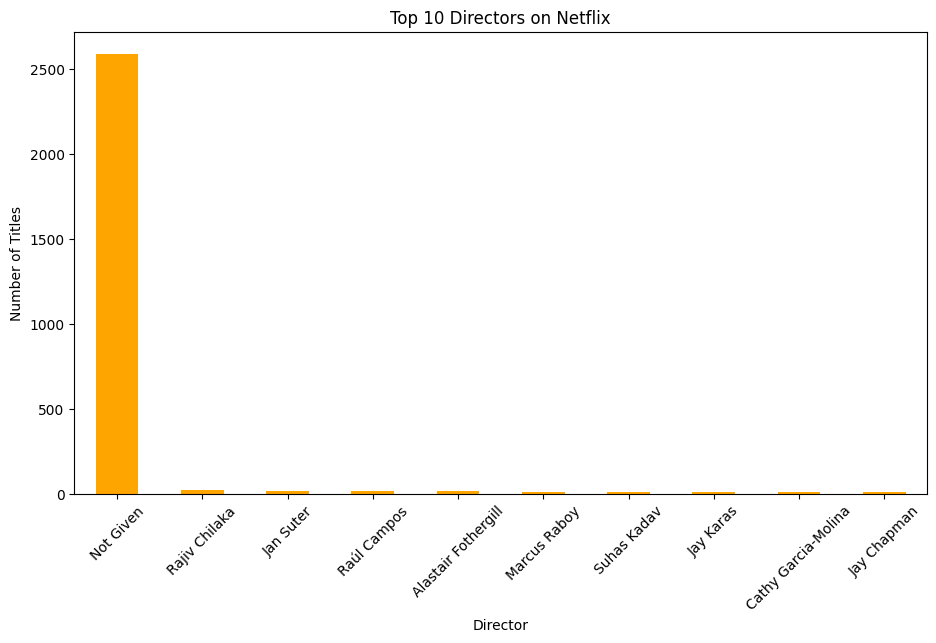

In [ ]:
# visualize
plt.figure(figsize = (11,6))
top_directors.plot(kind = 'bar', color = 'orange')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.show()

**Observation:**

Directors like Raúl Campos, Jan Suter, and Rajiv Chilaka have directed the most Netflix titles.
This suggests that Netflix collaborates frequently with these creators, especially for regional or recurring projects such as stand-up comedy specials or animated series.

# **CONCLUSION:**

After cleaning and analyzing the Netflix dataset, we discovered that Netflix’s content library is dominated by Movies over TV Shows.
The United States and India contribute the highest number of titles.
Popular genres such as Dramas, Comedies, and Documentaries make up a large portion of the catalog.
A steady increase in the number of titles added each year shows Netflix’s expansion, especially after 2015.
Directors like Raúl Campos and actors such as Anupam Kher have the most appearances in the dataset.

Overall, this analysis gives a clear picture of Netflix’s content trends and global reach.